<a href="https://colab.research.google.com/github/andrewtuma/Hankel_Testing/blob/main/Curtis_Duffing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

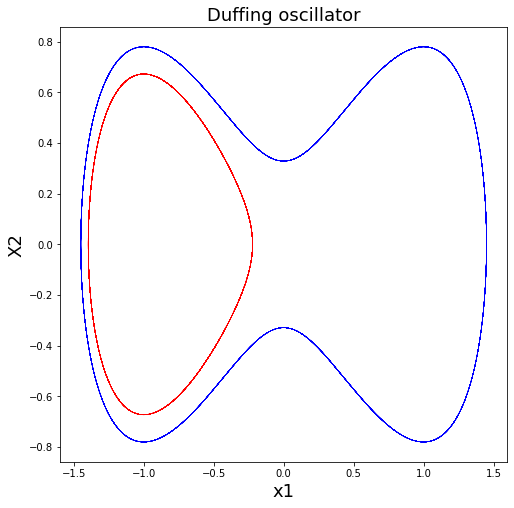

done


In [1]:
"""
    Created by:
        Opal Issan

    Modified:
        17 Nov 2020 - Jay Lago
"""
import numpy as np


# ==============================================================================
# Function Implementations
# ==============================================================================
def dyn_sys_discrete(lhs, mu=-0.05, lam=-1):
    """ example 1:
    ODE =>
    dx1/dt = mu*x1
    dx2/dt = lam*(x2-x1^2)

    By default: mu =-0.05, and lambda = -1.
    """
    rhs = np.zeros(2)
    rhs[0] = mu * lhs[0]
    rhs[1] = lam * (lhs[1] - (lhs[0]) ** 2.)
    return rhs

def dyn_sys_pendulum(lhs):
    """ pendulum example:
    ODE =>
    dx1/dt = x2
    dx2/dt = -sin(x1)
    """
    rhs = np.zeros(2)
    rhs[0] = lhs[1]
    rhs[1] = -np.sin(lhs[0])
    return rhs

def dyn_sys_fluid(lhs, mu=0.1, omega=1, A=-0.1, lam=10):
    """fluid flow example:
    ODE =>
    dx1/dt = mu*x1 - omega*x2 + A*x1*x3
    dx2/dt = omega*x1 + mu*x2 + A*x2*x3
    dx3/dt = -lam(x3 - x1^2 - x2^2)
    """
    rhs = np.zeros(3)
    rhs[0] = mu * lhs[0] - omega * lhs[1] + A * lhs[0] * lhs[2]
    rhs[1] = omega * lhs[0] + mu * lhs[1] + A * lhs[1] * lhs[2]
    rhs[2] = -lam * (lhs[2] - lhs[0] ** 2 - lhs[1] ** 2)
    return rhs

def dyn_sys_kdv(lhs, a1=0, c=3):
    """ planar kdv:
    dx1/dt = x2
    dx2/dt = a1 + c*x1 - 3*x2^2
    """
    rhs = np.zeros(2)
    rhs[0] = lhs[1]
    rhs[1] = a1 + c*lhs[0] - 3*lhs[0]**2
    return rhs

def dyn_sys_duffing_driven(lhs, alpha=0.1, gamma=0.05, omega=1.1):
    """ Duffing oscillator:
    dx/dt = y
    dy/dt = x - x^3 - gamma*y + alpha*cos(omega*t)
    """
    rhs = np.zeros(3)
    rhs[0] = lhs[1]
    rhs[1] = lhs[0] - lhs[0]**3 - gamma*lhs[1] + alpha*np.cos(omega*lhs[2])
    rhs[2] = lhs[2]
    return rhs

def dyn_sys_duffing(lhs):
    """ Duffing oscillator:
    dx/dt = y
    dy/dt = x - x^3
    """
    rhs = np.zeros(2)
    rhs[0] = lhs[1]
    rhs[1] = lhs[0] - lhs[0]**3
    return rhs

def dyn_sys_duffing_bollt(lhs, alpha=1.0, beta=-1.0, delta=0.5):
    """ Duffing oscillator:
    dx/dt = y
    dy/dt = -delta*y - x*(beta + alpha*x^2)
    """
    rhs = np.zeros(2)
    rhs[0] = lhs[1]
    rhs[1] = -delta*lhs[1] - lhs[0]*(beta + alpha*lhs[0]**2)
    return rhs

def rk4(lhs, dt, function):
    """
    :param lhs: previous step state.
    :param dt: delta t.
    :param data_type: "ex1" or "ex2".
    :return:  Runge–Kutta 4th order method.
    """
    k1 = dt * function(lhs)
    k2 = dt * function(lhs + k1 / 2.0)
    k3 = dt * function(lhs + k2 / 2.0)
    k4 = dt * function(lhs + k3)
    rhs = lhs + 1.0 / 6.0 * (k1 + 2.0 * (k2 + k3) + k4)
    return rhs

def data_maker_discrete(x_lower1, x_upper1, x_lower2, x_upper2, n_ic=1e4, dt=0.02, tf=1.0, seed=None, testing=False):
    """
    :param tf: final time. default is 15.
    :param dt: delta t.
    :param x_lower1: lower bound of x1, initial condition.
    :param x_upper1: upper bound of x1, initial condition.
    :param x_upper2: lower bound of x2, initial condition.
    :param x_lower2: upper bound of x1, initial condition.
    :param n_side: number of initial conditions on each axis. default is 100.
    :return:
    """
    # set seed
    np.random.seed(seed=seed)

    # dim - time steps
    nsteps = int(tf / dt)

    # number of initial conditions.
    n_ic = int(n_ic)

    # create initial condition grid
    if testing:
        icond1 = np.linspace(x_lower1, x_upper1, 10)
        icond2 = np.linspace(x_lower2, x_upper2, 2)
        xx, yy = np.meshgrid(icond1, icond2)

        # solve the system using Runge–Kutta 4th order method, see rk4 function above.
        data_mat = np.zeros((n_ic, 2, nsteps + 1), dtype=np.float64)
        ic = 0
        for x1 in range(2):
            for x2 in range(10):
                data_mat[ic, :, 0] = np.array([xx[x1, x2], yy[x1, x2]], dtype=np.float64)
                for jj in range(nsteps):
                    data_mat[ic, :, jj + 1] = rk4(data_mat[ic, :, jj], dt, dyn_sys_discrete)
                ic += 1
    else:
        icond1 = np.random.uniform(x_lower1, x_upper1, n_ic)
        icond2 = np.random.uniform(x_lower2, x_upper2, n_ic)

        # solve the system using Runge–Kutta 4th order method, see rk4 function above.
        data_mat = np.zeros((n_ic, 2, nsteps + 1), dtype=np.float64)
        for ii in range(n_ic):
            data_mat[ii, :, 0] = np.array([icond1[ii], icond2[ii]], dtype=np.float64)
            for jj in range(nsteps):
                data_mat[ii, :, jj + 1] = rk4(data_mat[ii, :, jj], dt, dyn_sys_discrete)

    return np.transpose(data_mat, [0, 2, 1])

def data_maker_pendulum(x_lower1, x_upper1, x_lower2, x_upper2, n_ic=10000, dt=0.02, tf=1.0, seed=None):
    """
    :param tf: final time. default is 15.
    :param dt: delta t.
    :param x_lower1: lower bound of x1, initial condition.
    :param x_upper1: upper bound of x1, initial condition.
    :param x_upper2: lower bound of x2, initial condition.
    :param x_lower2: upper bound of x1, initial condition.
    :param n_ic: number of initial conditions
    :return:
    """
    # set seed
    np.random.seed(seed=seed)

    # dim - time steps
    nsteps = int(tf / dt)

    # number of initial conditions
    n_ic = int(n_ic)

    # create initial condition grid
    rand_x1 = np.random.uniform(x_lower1, x_upper1, 100 * n_ic)
    rand_x2 = np.random.uniform(x_lower2, x_upper2, 100 * n_ic)
    max_potential = 0.99
    potential = lambda x, y: (1 / 2) * y ** 2 - np.cos(x)
    iconds = np.asarray([[x, y] for x, y in zip(rand_x1, rand_x2)
                         if potential(x, y) <= max_potential])[:n_ic, :]

    # solve the system using Runge–Kutta 4th order method, see rk4 function above
    data_mat = np.zeros((n_ic, 2, nsteps + 1), dtype=np.float64)
    for ii in range(n_ic):
        data_mat[ii, :, 0] = np.array([iconds[ii, 0], iconds[ii, 1]], dtype=np.float64)
        for jj in range(nsteps):
            data_mat[ii, :, jj + 1] = rk4(data_mat[ii, :, jj], dt, dyn_sys_pendulum)

    return np.transpose(data_mat, [0, 2, 1])

def data_maker_pendulum_uniform(n_ic=10000, dt=0.02, tf=3.0, seed=None):
    nsteps = np.int(tf / dt)
    n_ic = np.int(n_ic)
    rand_x1 = np.random.uniform(-3.1, 0, 100*n_ic)
    rand_x2 = np.zeros((100*n_ic))
    max_potential = 0.99
    potential = lambda x, y: (1 / 2) * y ** 2 - np.cos(x)
    iconds = np.asarray([[x, y] for x, y in zip(rand_x1, rand_x2)
                         if potential(x, y) <= max_potential])[:n_ic, :]
    data_mat = np.zeros((n_ic, 2, nsteps + 1), dtype=np.float64)
    for ii in range(n_ic):
        data_mat[ii, :, 0] = np.array([iconds[ii, 0], iconds[ii, 1]], dtype=np.float64)
        for jj in range(nsteps):
            data_mat[ii, :, jj + 1] = rk4(data_mat[ii, :, jj], dt, dyn_sys_pendulum)

    return np.transpose(data_mat, [0, 2, 1])

def data_maker_fluid_flow_slow(r_lower=0, r_upper=1.1, t_lower=0, t_upper=2*np.pi, n_ic=1e4, dt=0.05, tf=6, seed=None):
    """
    :param r_lower: lower bound for r. Default is 0.
    :param r_upper: Upper bound for r. Default is 1.
    :param t_lower: Lower bound for theta. Default is 0.
    :param t_upper: Upper bound for theta. Default is 2pi.
    :param n_ic: number of initial conditions. Default is 10000.
    :param dt: time step size. Default is 0.05.
    :param tf: final time. default is 6.
    :return: csv file
    """
    # set seed
    np.random.seed(seed=seed)

    # dim - time steps
    nsteps = int(tf / dt)

    # number of initial conditions for slow manifold.
    n_ic_slow = int(n_ic)

    # create initial condition grid.
    r = np.random.uniform(r_lower, r_upper, n_ic_slow)
    theta = np.random.uniform(t_lower, t_upper, n_ic_slow)

    # compute x1, x2, and x3, based on theta and r
    x1 = r * np.cos(theta)
    x2 = r * np.sin(theta)
    x3 = np.power(x1, 2) + np.power(x2, 2)

    # initialize initial conditions matrix.
    iconds = np.zeros((n_ic_slow, 3))

    # initial conditions for slow manifold.
    iconds[:n_ic_slow] = np.asarray([[x, y, z] for x, y, z in zip(x1, x2, x3)])

    # solve the system using Runge–Kutta 4th order method, see rk4 function above.
    data_mat = np.zeros((n_ic_slow, 3, nsteps + 1), dtype=np.float64)
    for ii in range(n_ic_slow):
        data_mat[ii, :, 0] = np.array([iconds[ii, 0], iconds[ii, 1], iconds[ii, 2]], dtype=np.float64)
        for jj in range(nsteps):
            data_mat[ii, :, jj + 1] = rk4(data_mat[ii, :, jj], dt, dyn_sys_fluid)

    return np.transpose(data_mat, [0, 2, 1])

def data_maker_fluid_flow_full(x1_lower=-1.1, x1_upper=1.1, x2_lower=-1.1, x2_upper=1.1, x3_lower=0.0, x3_upper=2.43,
                               n_ic=1e4, dt=0.05, tf=6, seed=None):
    # set seed
    np.random.seed(seed=seed)

    # Number of time steps
    nsteps = np.int(tf / dt)

    # Number of initial conditions
    n_ic = np.int(n_ic)

    # Create initial condition grid
    x1 = np.random.uniform(x1_lower, x1_upper, n_ic)
    x2 = np.random.uniform(x2_lower, x2_upper, n_ic)
    x3 = np.random.uniform(x3_lower, x3_upper, n_ic)

    # Initialize initial conditions matrix
    iconds = np.zeros((n_ic, 3))

    # Initial conditions zip
    iconds[:n_ic] = np.asarray([[x, y, z] for x, y, z in zip(x1, x2, x3)])

    # Solve the system using Runge–Kutta 4th order method, see rk4 function above
    data_mat = np.zeros((n_ic, 3, nsteps+1), dtype=np.float64)
    for ii in range(n_ic):
        data_mat[ii, :, 0] = np.array([iconds[ii, 0], iconds[ii, 1], iconds[ii, 2]], dtype=np.float64)
        for jj in range(nsteps):
            data_mat[ii, :, jj+1] = rk4(data_mat[ii, :, jj], dt, dyn_sys_fluid)

    return np.transpose(data_mat, [0, 2, 1])

def data_maker_kdv(x_lower1, x_upper1, x_lower2, x_upper2, n_ic=10000, dt=0.01, tf=1.0, seed=None):
    # Setup
    np.random.seed(seed=seed)
    nsteps = int(tf / dt)
    n_ic = int(n_ic)
    # Generate initial conditions
    icond1 = np.random.uniform(x_lower1, x_upper1, 10*n_ic)
    icond2 = np.random.uniform(x_lower2, x_upper2, 10*n_ic)
    n_try = 10*n_ic
    # Integrate
    data_mat = np.zeros((n_try, 2, nsteps+1), dtype=np.float64)
    for ii in range(n_try):
        data_mat[ii, :, 0] = np.array([icond1[ii], icond2[ii]], dtype=np.float64)
        for jj in range(nsteps):
            data_mat[ii, :, jj+1] = rk4(data_mat[ii, :, jj], dt, dyn_sys_kdv)
            # if (data_mat[ii, 0, jj+1] < x_lower1 or data_mat[ii, 1, jj+1] > x_upper1
            #         or data_mat[ii, 1, jj+1] < x_lower2 or data_mat[ii, 1, jj+1] > x_upper2):
            #     break
    accept = np.abs(data_mat[:, 0, -1]) < 3
    data_mat = data_mat[accept, :, :]
    accept = np.abs(data_mat[:, 1, -1]) < 3
    data_mat = data_mat[accept, :, :]
    data_mat = data_mat[:n_ic, :, :]
    return np.transpose(data_mat, [0, 2, 1])

def data_maker_duffing_driven(x_lower1, x_upper1, x_lower2, x_upper2, n_ic=10000, dt=0.01, tf=1.0, seed=None):
    # Setup
    np.random.seed(seed=seed)
    nsteps = int(tf / dt)
    n_ic = int(n_ic)
    # Generate initial conditions
    icond1 = np.random.uniform(x_lower1, x_upper1, n_ic)
    icond2 = np.random.uniform(x_lower2, x_upper2, n_ic)
    # Integrate
    data_mat = np.zeros((n_ic, 3, nsteps+1), dtype=np.float64)
    for ii in range(n_ic):
        data_mat[ii, :2, 0] = np.array([icond1[ii], icond2[ii]], dtype=np.float64)
        for jj in range(nsteps):
            data_mat[ii, :, jj+1] = rk4(data_mat[ii, :, jj], dt, dyn_sys_duffing_driven)
            data_mat[ii, 2, jj+1] = data_mat[ii, 2, jj] + dt
    return np.transpose(data_mat, [0, 2, 1])

def data_maker_duffing(x_lower1, x_upper1, x_lower2, x_upper2, n_ic=10000, dt=0.01, tf=1.0, seed=None):
    # Setup
    np.random.seed(seed=seed)
    nsteps = int(tf / dt)
    n_ic = int(n_ic)
    # Generate initial conditions
    icond1 = np.random.uniform(x_lower1, x_upper1, n_ic)
    icond2 = np.random.uniform(x_lower2, x_upper2, n_ic)
    # Integrate
    data_mat = np.zeros((n_ic, 2, nsteps+1), dtype=np.float64)
    for ii in range(n_ic):
        data_mat[ii, :, 0] = np.array([icond1[ii], icond2[ii]], dtype=np.float64)
        for jj in range(nsteps):
            data_mat[ii, :, jj+1] = rk4(data_mat[ii, :, jj], dt, dyn_sys_duffing)
    return np.transpose(data_mat, [0, 2, 1])

def data_maker_duffing_bollt(x_lower1, x_upper1, x_lower2, x_upper2, n_ic=10000, dt=0.01, tf=1.0, seed=None):
    # Setup
    np.random.seed(seed=seed)
    nsteps = int(tf / dt)
    n_ic = int(n_ic)
    # Generate initial conditions
    icond1 = np.random.uniform(x_lower1, x_upper1, n_ic)
    icond2 = np.random.uniform(x_lower2, x_upper2, n_ic)
    # Integrate
    data_mat = np.zeros((n_ic, 2, nsteps+1), dtype=np.float64)
    for ii in range(n_ic):
        data_mat[ii, :, 0] = np.array([icond1[ii], icond2[ii]], dtype=np.float64)
        for jj in range(nsteps):
            data_mat[ii, :, jj+1] = rk4(data_mat[ii, :, jj], dt, dyn_sys_duffing_bollt)
    return np.transpose(data_mat, [0, 2, 1])

# ==============================================================================
# Test program
# ==============================================================================
if __name__ == "__main__":
    import matplotlib.pyplot as plt

    create_discrete = False
    create_pendulum = False
    create_fluid_flow_slow = False
    create_fluid_flow_full = False
    create_kdv = False
    create_duffing = True

    if create_discrete:
        # Generate the data
        data = data_maker_discrete(x_lower1=-0.5, x_upper1=0.5, x_lower2=-0.5, x_upper2=0.5, n_ic=20, dt=0.02, tf=10)
        # Visualize
        plt.figure(1, figsize=(8, 8))
        for ii in range(data.shape[0]):
            plt.plot(data[ii, :, 0], data[ii, :, 1], '-')
        plt.xlabel("x1", fontsize=18)
        plt.ylabel("X2", fontsize=18)
        plt.title("Discrete dataset", fontsize=18)

    if create_pendulum:
        # Generate the data
        data = data_maker_pendulum(x_lower1=-3.1, x_upper1=3.1, x_lower2=-2, x_upper2=2, n_ic=20, dt=0.02, tf=20)
        # Visualize
        plt.figure(2, figsize=(8, 8))
        for ii in range(data.shape[0]):
            plt.plot(data[ii, :, 0], data[ii, :, 1], '-')
        plt.xlabel("x1", fontsize=18)
        plt.ylabel("X2", fontsize=18)
        plt.title("Pendulum dataset", fontsize=18)

    if create_fluid_flow_slow:
        # Generate the data
        data = data_maker_fluid_flow_slow(r_lower=0, r_upper=1.1, t_lower=0, t_upper=2*np.pi, n_ic=20, dt=0.05, tf=10)
        # Visualize
        fig = plt.figure(3, figsize=(8, 8))
        ax = plt.axes(projection='3d')
        for ii in range(data.shape[0]):
            ax.plot3D(data[ii, :, 0], data[ii, :, 1], data[ii, :, 2])
        ax.set_xlabel("$x_{1}$", fontsize=18)
        ax.set_ylabel("$x_{2}$", fontsize=18)
        ax.set_zlabel("$x_{3}$", fontsize=18)
        plt.title("Fluid Flow dataset", fontsize=20)

    if create_fluid_flow_full:
        # Generate the data
        data = data_maker_fluid_flow_full(x1_lower=-1.1, x1_upper=1.1, x2_lower=-1.1, x2_upper=1.1,
                                          x3_lower=0.0, x3_upper=2.43, n_ic=20, dt=0.05, tf=6)
        # Visualize
        fig = plt.figure(4, figsize=(8, 8))
        ax = plt.axes(projection='3d')
        for ii in range(data.shape[0]):
            ax.plot3D(data[ii, :, 0], data[ii, :, 1], data[ii, :, 2])
        ax.set_xlabel("$x_{1}$", fontsize=18)
        ax.set_ylabel("$x_{2}$", fontsize=18)
        ax.set_zlabel("$x_{3}$", fontsize=18)
        plt.title("Fluid Flow dataset", fontsize=20)

    if create_kdv:
        # Generate the data
        data = data_maker_kdv(x_lower1=-2, x_upper1=2, x_lower2=-2, x_upper2=2, n_ic=1000, dt=0.01, tf=20)
        # Visualize
        plt.figure(2, figsize=(8, 8))
        for ii in range(data.shape[0]):
            npts = np.sum(np.abs(data[ii, :, 0]) > 0)
            plt.plot(data[ii, :npts, 0], data[ii, :npts, 1], 'r-', lw=0.25)
        plt.xlabel("x1", fontsize=18)
        plt.ylabel("X2", fontsize=18)
        plt.title("KdV dataset", fontsize=18)

    if create_duffing:
        # Generate the data
        data = data_maker_duffing(x_lower1=-1, x_upper1=1, x_lower2=-1, x_upper2=1, n_ic=2, dt=0.05, tf=200)
        # Visualize
        plt.figure(2, figsize=(8, 8))
        plt.plot(data[0, :, 0], data[0, :, 1], 'r-', lw=0.5)
        plt.plot(data[1, :, 0], data[1, :, 1], 'b-', lw=0.5)
        plt.xlabel("x1", fontsize=18)
        plt.ylabel("X2", fontsize=18)
        plt.title("Duffing oscillator", fontsize=18)

    plt.show()
    print("done")


In [2]:
"""
    Created by:
        Jay Lago

    Modified:
        17 Nov 2020 - Jay Lago
"""
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np

font = {'family': 'DejaVu Sans', 'size': 18}
matplotlib.rc('font', **font)


def diagnostic_plot(y_pred, y_true, hyp_params, epoch, save_path, loss_comps, val_loss):
    if hyp_params['experiment'] == 'discrete' or \
            hyp_params['experiment'] == 'pendulum' or \
            hyp_params['experiment'] == 'van_der_pol' or \
            hyp_params['experiment'] == 'duffing' or \
            hyp_params['experiment'] == 'kdv':
        plot_2D(y_pred, y_true, hyp_params, epoch, save_path, loss_comps, val_loss)
    elif hyp_params['experiment'] == 'fluid_flow_slow' or \
            hyp_params['experiment'] == 'fluid_flow_full':
        plot_3d(y_pred, y_true, hyp_params, epoch, save_path, loss_comps, val_loss)
    else:
        print("unknown experiment, create new diagnostic plots")

def net_steps_plot(num_steps):
    
    plt.plot(num_steps)
    plt.title("Delay Path")
    plt.ylabel("Tau")
    plt.xlabel("batch #")
    plt.savefig("num_steps.png")
    plt.close()
        
def loss_diff_plot(loss_diff):
    plt.plot(np.abs(loss_diff))
    plt.title("Difference in step loss")
    plt.ylabel("Loss Difference")
    plt.yscale("log")
    plt.savefig("val_loss_dif.png")
    plt.close()
        
        
def plot_2D(y_pred, y_true, hyp_params, epoch, save_path, loss_comps, val_loss):
    enc = y_pred[0]
    enc_dec = y_pred[1]
    enc_adv_dec = y_pred[2]
    enc_adv = y_pred[3]

    fig, ax = plt.subplots(nrows=3, ncols=3, sharex=False, sharey=False, figsize=(40, 20))
    ax = ax.flat
    skip = 1

    # Validation batch
    for ii in np.arange(0, y_true.shape[0], skip):
        ax[0].plot(y_true[ii, :, 0], y_true[ii, :, 1], '-')
    ax[0].scatter(y_true[:, 0, 0], y_true[:, 0, 1])
    ax[0].grid()
    ax[0].set_xlabel("x1")
    ax[0].set_ylabel("x2")
    ax[0].set_title("Validation Data (x)")

    # Encoded-advanced-decoded time series
    for ii in np.arange(0, enc_adv_dec.shape[0], skip):
        ax[1].plot(enc_adv_dec[ii, :, 0], enc_adv_dec[ii, :, 1], '-')
    ax[1].scatter(enc_adv_dec[:, 0, 0], enc_adv_dec[:, 0, 1])
    ax[1].grid()
    ax[1].set_xlabel("x1")
    ax[1].set_ylabel("x2")
    ax[1].set_title("Encoded-Advanced-Decoded (x_adv))")

    # Encoded time series
    for ii in np.arange(0, enc.shape[0], skip):
        ax[2].plot(enc[ii, :, 0], enc[ii, :, 1], '-')
    ax[2].scatter(enc[:, 0, 0], enc[:, 0, 1])
    ax[2].grid()
    ax[2].set_xlabel("y1")
    ax[2].set_ylabel("y2")
    ax[2].axis("equal")
    ax[2].set_title("Encoded (y)")

    # Encoded-decoded time series
    for ii in np.arange(0, enc_dec.shape[0], skip):
        ax[3].plot(enc_dec[ii, :, 0], enc_dec[ii, :, 1], '-')
    ax[3].scatter(enc_dec[:, 0, 0], enc_dec[:, 0, 1])
    ax[3].grid()
    ax[3].set_xlabel("x1")
    ax[3].set_ylabel("x2")
    ax[3].set_title("Encoded-Decoded (x_ae)")

    # Encoded-advanced time series
    for ii in np.arange(0, enc_adv.shape[0], skip):
        ax[4].plot(enc_adv[ii, :, 0], enc_adv[ii, :, 1], '-')
    ax[4].scatter(enc_adv[:, 0, 0], enc_adv[:, 0, 1])
    ax[4].grid()
    ax[4].set_xlabel("y1")
    ax[4].set_ylabel("y2")
    ax[4].axis("equal")
    ax[4].set_title("Encoded-Advanced (y_adv))")

    # Loss components
    lw = 3
    loss_comps = np.asarray(loss_comps)
    ax[5].plot(val_loss, color='k', linewidth=lw, label='total')
    ax[5].set_title("Total Loss")
    ax[5].grid()
    ax[5].set_xlabel("Epoch")
    ax[5].set_ylabel("$log_{10}(L)$")
    ax[5].legend(loc="upper right")

    ax[6].plot(loss_comps[:, 0], color='r', linewidth=lw, label='recon')
    ax[6].set_title("Recon Loss")
    ax[6].grid()
    ax[6].set_xlabel("Epoch")
    ax[6].set_ylabel("$log_{10}(L_{recon})$")
    ax[6].legend(loc="upper right")

    ax[7].plot(loss_comps[:, 1], color='b', linewidth=lw, label='pred')
    ax[7].set_title("Prediction Loss")
    ax[7].grid()
    ax[7].set_xlabel("Epoch")
    ax[7].set_ylabel("$log_{10}(L_{pred})$")
    ax[7].legend(loc="upper right")

    ax[8].plot(loss_comps[:, 2], color='g', linewidth=lw, label='dmd')
    ax[8].set_title("DMD")
    ax[8].grid()
    ax[8].set_xlabel("Epoch")
    ax[8].set_ylabel("$log_{10}(L_{dmd})$")
    ax[8].legend(loc="upper right")

    fig.suptitle(
        "Epoch: {cur_epoch}/{max_epoch}, Learn Rate: {lr:.5f}, Val. Loss: {loss:.3f}".format(
            cur_epoch=epoch,
            max_epoch=hyp_params['max_epochs'],
            lr=hyp_params['lr'],
            loss=val_loss[-1]))

    plt.savefig(save_path)
    plt.close()


def plot_3d(y_pred, y_true, hyp_params, epoch, save_path, loss_comps, val_loss):
    enc = y_pred[0]
    enc_dec = y_pred[1]
    enc_adv_dec = y_pred[2]
    enc_adv = y_pred[3]

    font = {'family': 'DejaVu Sans', 'size': 10}
    matplotlib.rc('font', **font)

    skip = 8
    fig = plt.figure(figsize=(40, 20))

    # Validation batch
    ax = fig.add_subplot(3, 3, 1, projection='3d')
    for ii in np.arange(0, y_true.shape[0], skip):
        ii = int(ii)
        x1 = y_true[ii, :, 0]
        x2 = y_true[ii, :, 1]
        x3 = y_true[ii, :, 2]
        ax.plot3D(x1, x2, x3)
    ax.set_xlabel("$x_{1}$")
    ax.set_ylabel("$x_{2}$")
    ax.set_zlabel("$x_{3}$")
    ax.set_title("Validation Data (x)")

    # Encoded-advanced-decoded time series
    ax = fig.add_subplot(3, 3, 2, projection='3d')
    for ii in np.arange(0, enc_adv_dec.shape[0], skip):
        ii = int(ii)
        x1 = enc_adv_dec[ii, :, 0]
        x2 = enc_adv_dec[ii, :, 1]
        x3 = enc_adv_dec[ii, :, 2]
        ax.plot3D(x1, x2, x3)
    ax.set_xlabel("$x_{1}$")
    ax.set_ylabel("$x_{2}$")
    ax.set_zlabel("$x_{3}$")
    ax.set_title("Encoded-Advanced-Decoded (x_adv))")

    # Encoded time series
    ax = fig.add_subplot(3, 3, 3, projection='3d')
    for ii in np.arange(0, enc.shape[0], skip):
        ii = int(ii)
        x1 = enc[ii, :, 0]
        x2 = enc[ii, :, 1]
        x3 = enc[ii, :, 2]
        ax.plot3D(x1, x2, x3)
    ax.set_xlabel("$y_{1}$")
    ax.set_ylabel("$y_{2}$")
    ax.set_zlabel("$y_{3}$")
    ax.set_title("Encoded (y)")

    # Encoded-decoded time series
    ax = fig.add_subplot(3, 3, 4, projection='3d')
    for ii in np.arange(0, enc_dec.shape[0], skip):
        ii = int(ii)
        x1 = enc_dec[ii, :, 0]
        x2 = enc_dec[ii, :, 1]
        x3 = enc_dec[ii, :, 2]
        ax.plot3D(x1, x2, x3)
    ax.set_xlabel("$x_{1}$")
    ax.set_ylabel("$x_{2}$")
    ax.set_zlabel("$x_{3}$")
    ax.set_title("Encoded-Decoded (x_ae)")

    # Encoded-advanced time series
    ax = fig.add_subplot(3, 3, 5, projection='3d')
    for ii in np.arange(0, enc_adv.shape[0], skip):
        ii = int(ii)
        x1 = enc_adv[ii, :, 0]
        x2 = enc_adv[ii, :, 1]
        x3 = enc_adv[ii, :, 2]
        ax.plot3D(x1, x2, x3)
    ax.set_xlabel("$y_{1}$")
    ax.set_ylabel("$y_{2}$")
    ax.set_zlabel("$y_{3}$")
    ax.set_title("Encoded-Advanced (y_adv))")

    # Loss components
    lw = 3
    loss_comps = np.asarray(loss_comps)
    ax = fig.add_subplot(3, 3, 6)
    ax.plot(val_loss, color='k', linewidth=lw, label='total')
    ax.set_title("Total Loss")
    ax.grid()
    ax.set_xlabel("Epoch")
    ax.set_ylabel("$log_{10}(L)$")
    ax.legend(loc="upper right")

    ax = fig.add_subplot(3, 3, 7)
    ax.plot(loss_comps[:, 0], color='r', linewidth=lw, label='recon')
    ax.set_title("Recon Loss")
    ax.grid()
    ax.set_xlabel("Epoch")
    ax.set_ylabel("$log_{10}(L_{recon})$")
    ax.legend(loc="upper right")

    ax = fig.add_subplot(3, 3, 8)
    ax.plot(loss_comps[:, 1], color='b', linewidth=lw, label='pred')
    ax.set_title("Prediction Loss")
    ax.grid()
    ax.set_xlabel("Epoch")
    ax.set_ylabel("$log_{10}(L_{pred})$")
    ax.legend(loc="upper right")

    ax = fig.add_subplot(3, 3, 9)
    ax.plot(loss_comps[:, 2], color='g', linewidth=lw, label='dmd')
    ax.set_title("DMD")
    ax.grid()
    ax.set_xlabel("Epoch")
    ax.set_ylabel("$log_{10}(L_{dmd})$")
    ax.legend(loc="upper right")

    fig.suptitle(
        "Epoch: {cur_epoch}/{max_epoch}, Learn Rate: {lr:.5f}, Val. Loss: {loss:.3f}".format(
            cur_epoch=epoch,
            max_epoch=hyp_params['max_epochs'],
            lr=hyp_params['lr'],
            loss=val_loss[-1]))

    plt.savefig(save_path)
    plt.close()


In [3]:
"""
    Created by:
        Jay Lago - 23 Dec 2020
"""
import os
import pickle
import time
import datetime as dt
import numpy as np
import tensorflow as tf

def train_model(hyp_params, train_data, val_set, model, loss):
    # Dictionary to store all relevant training parameters and losses
    train_params = dict()
    train_params['start_time'] = time.time()
    train_params['train_loss_results'] = []
    train_params['val_loss_results'] = []
    train_params['val_loss_comps_avgs'] = []
    # Step = 1
    # total = -16
    # total_steps = [total]
    # original_window = model.window
    for epoch in range(1, hyp_params['max_epochs'] + 1):
        epoch_start_time = dt.datetime.now()
        epoch_time = time.time()
        epoch_loss_avg_train = tf.keras.metrics.Mean()
        epoch_loss_avg_val = tf.keras.metrics.Mean()
        # epoch_steps = []
        # model.window = original_window
        # Shuffle, batch, and prefetch training data to the GPU
        train_set = train_data.shuffle(hyp_params['num_train_init_conds']) \
            .batch(hyp_params['batch_size'], drop_remainder=True)
        train_set = train_set.prefetch(tf.data.AUTOTUNE)

        # Set optimizer
        if hyp_params['optimizer'] == 'adam':
            myoptimizer = tf.keras.optimizers.Adam(hyp_params['lr'])
        if hyp_params['optimizer'] == 'sgd':
            myoptimizer = tf.keras.optimizers.SGD(learning_rate=hyp_params['lr'], momentum=0.9)

        # Begin batch training
        with tf.device(hyp_params['device']):
            for train_batch in train_set:
                with tf.GradientTape() as tape:
                    train_pred = model(train_batch, training=True)
                    train_loss = loss(train_pred, train_batch)
                gradients = tape.gradient(train_loss, model.trainable_weights)
                myoptimizer.apply_gradients([(grad, var) for (grad, var) in zip(gradients, model.trainable_weights)
                                             if grad is not None])
                myoptimizer.apply_gradients(zip(gradients, model.trainable_weights))
                epoch_loss_avg_train.update_state(train_loss)

            # Batch validation
            lrecon = tf.keras.metrics.Mean()
            lpred = tf.keras.metrics.Mean()
            ldmd = tf.keras.metrics.Mean()

            for val_batch in val_set:
                val_pred = model(val_batch)
                val_loss = loss(val_pred, val_batch)
                epoch_loss_avg_val.update_state(val_loss)
                # Save loss components for diagnostic plotting
                lrecon.update_state(np.log10(loss.loss_recon))
                lpred.update_state(np.log10(loss.loss_pred))
                ldmd.update_state(np.log10(loss.loss_dmd))
                
                # if model.window + Step >= model.num_pred_steps:
                #     range_list = np.array([-Step, 0])
                # elif model.window - Step <= model.num_pred_steps - 80:
                #     range_list = np.array([0, Step])
                # else:
                #     range_list = np.array([-Step, 0, Step])

                # val_preds = [None]*np.size(range_list)
                # val_losses = np.zeros(np.size(range_list), dtype=np.float64)
                # for jj in range(np.size(range_list)):
                #     model.window = original_window + range_list[jj]
                #     val_preds[jj] = model(val_batch)
                #     val_losses[jj] = loss(val_preds[jj], val_batch)

                # min_ind = np.argmin(val_losses)
                # val_pred = val_preds[min_ind]
                # val_loss = val_losses[min_ind]
                # epoch_steps.append(range_list[min_ind])               

                # epoch_loss_avg_val.update_state(val_loss)
                # # Save loss components for diagnostic plotting
                # lrecon.update_state(np.log10(loss.loss_recon))
                # lpred.update_state(np.log10(loss.loss_pred))
                # ldmd.update_state(np.log10(loss.loss_dmd))

            train_params['val_loss_comps_avgs'].append([lrecon.result(), lpred.result(), ldmd.result()])

        # Report training status
        train_params['train_loss_results'].append(np.log10(epoch_loss_avg_train.result()))
        train_params['val_loss_results'].append(np.log10(epoch_loss_avg_val.result()))
        print("Epoch {epoch} of {max_epoch} / Train {train:3.7f} / Val {test:3.7f} / LR {lr:2.7f} / {time:4.2f} seconds"
              .format(epoch=epoch, max_epoch=hyp_params['max_epochs'],
                      train=train_params['train_loss_results'][-1],
                      test=train_params['val_loss_results'][-1],
                      lr=hyp_params['lr'],
                      time=time.time() - epoch_time))

        # mode = max(set(epoch_steps), key=epoch_steps.count)
        # print("The most common window shift was: ", mode)
        # original_window = original_window + mode
        # print("New window size for the next epoch: ", original_window)
        # total = total + mode
        # total_steps.append(total)        
        
        # Save training diagnostic plots
        if epoch == 1 or epoch % hyp_params['plot_every'] == 0:
            if not os.path.exists(hyp_params['plot_path']):
                os.makedirs(hyp_params['plot_path'])
            this_plot = hyp_params['plot_path'] + '/' + epoch_start_time.strftime("%Y%m%d%H%M%S") + '.png'
            diagnostic_plot(val_pred, val_batch, hyp_params, epoch,
                               this_plot, train_params['val_loss_comps_avgs'],
                               train_params['val_loss_results'])

        # Save model
        if epoch % hyp_params['save_every'] == 0 or epoch == hyp_params['max_epochs']:
            if not os.path.exists(hyp_params['model_path']):
                os.makedirs(hyp_params['model_path'])
            model_path = hyp_params['model_path'] + '/epoch_{epoch}_loss_{loss:2.3}' \
                .format(epoch=epoch, loss=train_params['val_loss_results'][-1])
            model.save_weights(model_path + '.h5')
            pickle.dump(hyp_params, open(model_path + '.pkl', 'wb'))

    print("\nTotal training time: %4.2f minutes" % ((time.time() - train_params['start_time']) / 60.0))
    print("Final train loss: %2.7f" % (train_params['train_loss_results'][-1]))
    print("Final validation loss: %2.7f" % (train_params['val_loss_results'][-1]))
    # print("here are the delay steps taken: ")
    # print(total_steps)
    # hf.net_steps_plot(total_steps)
    results = dict()
    results['model'] = model
    results['loss'] = loss
    results['val_loss_history'] = train_params['val_loss_results']
    results['val_loss_comps'] = train_params['val_loss_comps_avgs']

    return results


In [4]:
"""
    Author:
        Jay Lago, NIWC/SDSU, 2021
"""
import tensorflow as tf
import numpy as np
import scipy as sp

from tensorflow import keras
from tensorflow.keras.layers import *


class HDMD(keras.Model):
    def __init__(self, hyp_params, **kwargs):
        super(HDMD, self).__init__(**kwargs)

        # Parameters
        self.batch_size = hyp_params['batch_size']
        self.phys_dim = hyp_params['phys_dim']
        self.latent_dim = hyp_params['latent_dim']
        self.num_time_steps = int(hyp_params['num_time_steps'])
        self.num_pred_steps = int(hyp_params['num_pred_steps'])
        self.time_final = hyp_params['time_final']
        self.num_en_layers = hyp_params['num_en_layers']
        self.num_neurons = hyp_params['num_en_neurons']
        self.delta_t = hyp_params['delta_t']
        self.precision = hyp_params['precision']

        self.num_observables = hyp_params['num_observables']
        self.threshold = hyp_params['threshold']
        self.observation_dimension = hyp_params['observation_dimension']
        self.window = self.num_time_steps - (self.num_observables - 1)

        self.enc_input = (self.num_time_steps, self.phys_dim)
        self.dec_input = (self.window-1, self.latent_dim)

        if self.precision == 'float32':
            self.precision_complex = tf.complex64
        else:
            self.precision_complex = tf.complex128

        # Construct the ENCODER network
        self.encoder = keras.Sequential(name="encoder")
        self.encoder.add(Dense(self.num_neurons,
                               input_shape=self.enc_input,
                               activation=hyp_params['hidden_activation'],
                               kernel_initializer=hyp_params['kernel_init_enc'],
                               bias_initializer=hyp_params['bias_initializer'],
                               trainable=True, name='enc_in'))
        for ii in range(self.num_en_layers):
            self.encoder.add(Dense(self.num_neurons,
                                   activation=hyp_params['hidden_activation'],
                                   kernel_initializer=hyp_params['kernel_init_enc'],
                                   bias_initializer=hyp_params['bias_initializer'],
                                   trainable=True, name='enc_' + str(ii)))
        self.encoder.add(Dense(self.latent_dim,
                               activation=hyp_params['ae_output_activation'],
                               kernel_initializer=hyp_params['kernel_init_enc'],
                               bias_initializer=hyp_params['bias_initializer'],
                               trainable=True, name='enc_out'))

        # Construct the DECODER network
        self.decoder = keras.Sequential(name="decoder")
        self.decoder.add(Dense(self.num_neurons,
                               input_shape=self.dec_input,
                               activation=hyp_params['hidden_activation'],
                               kernel_initializer=hyp_params['kernel_init_enc'],
                               bias_initializer=hyp_params['bias_initializer'],
                               trainable=True, name='dec_in'))
        for ii in range(self.num_en_layers):
            self.decoder.add(Dense(self.num_neurons,
                                   activation=hyp_params['hidden_activation'],
                                   kernel_initializer=hyp_params['kernel_init_dec'],
                                   bias_initializer=hyp_params['bias_initializer'],
                                   trainable=True, name='dec_' + str(ii)))
        self.decoder.add(Dense(self.phys_dim,
                               activation=hyp_params['ae_output_activation'],
                               kernel_initializer=hyp_params['kernel_init_dec'],
                               bias_initializer=hyp_params['bias_initializer'],
                               trainable=True, name='dec_out'))

    def call(self, x):
        # Encode the entire time series
        y = self.encoder(x)
        x_ae = self.decoder(y[:, :(self.window-1), :])

        # Reshape for DMD step
        yt = tf.transpose(y, [0, 2, 1])

        y_adv, evals, evecs, phi = self.hankel_dmd(yt)

        # Generate latent time series using DMD prediction
        #y_adv, evals, evecs, phi = self.edmd(yt)

        # Decode the latent trajectories
        x_adv = self.decoder(y_adv)

        # Model weights
        weights = self.trainable_weights

        return [y, x_ae, x_adv, y_adv, weights, evals, evecs, phi]

    def edmd(self, Y):
        Y_m = Y[:, :, :-1]
        Y_p = Y[:, :, 1:]

        sig, U, V = tf.linalg.svd(Y_m, compute_uv=True, full_matrices=False)
        sigr_inv = tf.linalg.diag(1.0 / sig)
        Uh = tf.linalg.adjoint(U)

        A = Y_p @ V @ sigr_inv @ Uh
        evals, evecs = tf.linalg.eig(A)
        phi = tf.linalg.solve(evecs, tf.cast(Y_m, dtype=self.precision_complex))
        y0 = phi[:, :, 0]
        y0 = y0[:, :, tf.newaxis]

        recon = tf.TensorArray(self.precision_complex, size=self.num_pred_steps)
        recon = recon.write(0, evecs @ y0)
        evals_k = tf.identity(evals)
        for ii in tf.range(1, self.num_pred_steps):
            tmp = evecs @ (tf.linalg.diag(evals_k) @ y0)
            recon = recon.write(ii, tmp)
            evals_k = evals_k * evals
        recon = tf.math.real(tf.transpose(tf.squeeze(recon.stack()), perm=[1, 0, 2]))
        return recon, evals, evecs, phi

    def hankel_matrix(self, tseries):
        # note, we are working exclusively in NumPy/SciPy here
        tcol = tseries[:self.num_observables]
        trow = tseries[(self.num_observables-1):]
        hmat = np.flipud(sp.linalg.toeplitz(tcol[::-1], trow))
        return hmat

    def hankel_dmd(self, Y):
        winsize = self.window
        nobs = self.num_observables
        # Perform DMD method.  Note, we need to be careful about how we break the concantenated Hankel matrix apart.

        gm = tf.Variable(tf.zeros([self.num_observables, self.batch_size * (self.window - 1)], dtype=self.precision))
        gp = tf.Variable(tf.zeros([self.num_observables, self.batch_size * (self.window - 1)], dtype=self.precision))
        Yobserved = (tf.squeeze(Y[:, self.observation_dimension, :])).numpy()

        for ll in range(self.batch_size):
            tseries = Yobserved[ll, :]
            tcol = tseries[:nobs]
            trow = tseries[(nobs - 1):]
            hmat = np.flipud(sp.linalg.toeplitz(tcol[::-1], trow))
            gm[:, ll * (winsize - 1):(ll + 1) * (winsize - 1)].assign(hmat[:, :-1])
            gp[:, ll * (winsize - 1):(ll + 1) * (winsize - 1)].assign(hmat[:, 1:])

        sig, U, V = tf.linalg.svd(gm, compute_uv=True, full_matrices=False)
        sig_inv = tf.linalg.diag(1.0 / sig)
        Uh = tf.linalg.adjoint(U)
        A = gp @ V @ sig_inv @ Uh
        evals, evecs = tf.linalg.eig(A)
        phi = tf.linalg.solve(evecs, tf.cast(gm, dtype=self.precision_complex))

        # Build reconstruction
        phiinit = phi[:, ::(self.window-1)]
        initconds = tf.cast(tf.transpose(tf.squeeze(Y[:, :, 0])), dtype=self.precision_complex)
        sigp, Up, Vp = tf.linalg.svd(phiinit, compute_uv=True, full_matrices=False)
        sigp_inv = tf.cast(tf.linalg.diag(1.0 / sigp), dtype=self.precision_complex)
        kmat = initconds @ Vp @ sigp_inv @ tf.linalg.adjoint(Up)
        recon = tf.reshape(tf.transpose(tf.math.real(kmat @ phi)), [self.batch_size, self.window-1, self.phys_dim])
        return recon, evals, evecs, phi

    def get_config(self):
        base_config = super().get_config()
        return {**base_config,
                'encoder': self.encoder,
                'decoder': self.decoder}


In [5]:
"""
    Author:
        Jay Lago, NIWC/SDSU, 2021
"""
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.losses import MSE


class LossDLDMD(keras.losses.Loss):
    def __init__(self, hyp_params, **kwargs):
        super(LossDLDMD, self).__init__(**kwargs)

        # Parameters
        self.a1 = hyp_params['a1']
        self.a2 = hyp_params['a2']
        self.a3 = hyp_params['a3']
        self.a4 = hyp_params['a4']
        self.precision = hyp_params['precision']
        self.num_time_steps = int(hyp_params['num_time_steps'])
        self.num_observables = hyp_params['num_observables']
        self.window = self.num_time_steps - (self.num_observables - 1)

        # Loss components
        self.loss_recon = tf.constant(0.0, dtype=self.precision)
        self.loss_pred = tf.constant(0.0, dtype=self.precision)
        self.loss_dmd = tf.constant(0.0, dtype=self.precision)
        self.loss_reg = tf.constant(0.0, dtype=self.precision)
        self.total_loss = tf.constant(0.0, dtype=self.precision)

    def call(self, model, obs):
        """
            model = [y, x_ae, x_adv, y_adv_real, weights, evals, evecs, phi]
        """
        y = tf.identity(model[0])
        x_ae = tf.identity(model[1])
        x_adv = tf.identity(model[2])
        weights = model[4]
        pred_horizon = -1
        obs_windowed = obs[:, :(self.window-1), :]
        # Autoencoder reconstruction
        self.loss_recon = tf.reduce_mean(MSE(obs_windowed, x_ae))

        # DMD reconstruction in the latent space
        self.loss_dmd = self.dmdloss(y)

        # Future state prediction
        self.loss_pred = tf.reduce_mean(MSE(obs_windowed[:, :pred_horizon, :], x_adv[:, :pred_horizon, :]))

        # Regularization on weights
        self.loss_reg = tf.add_n([tf.nn.l2_loss(w) for w in weights])

        # Total loss
        self.total_loss = self.a1 * self.loss_recon + self.a2 * self.loss_dmd + \
                          self.a3 * self.loss_pred + self.a4 * self.loss_reg

        return self.total_loss

    @tf.function
    def dmdloss(self, y):
        y_m = tf.transpose(y, perm=[0, 2, 1])[:, :, :-1]
        y_p = tf.transpose(y, perm=[0, 2, 1])[:, :, 1:]
        [_, _, V] = tf.linalg.svd(y_m, compute_uv=True, full_matrices=False)
        VVh = V @ tf.linalg.adjoint(V)
        eye_mat = tf.eye(VVh.shape[-1], batch_shape=[VVh.shape[0]], dtype=self.precision)
        return tf.reduce_mean(tf.norm(y_p @ (eye_mat - VVh), ord='fro', axis=[-2, -1]))

    def get_config(self):
        base_config = super().get_config()
        return {**base_config,
                'loss_recon': self.loss_recon,
                'loss_pred': self.loss_pred,
                'loss_dmd': self.loss_dmd,
                'loss_inf': self.loss_inf,
                'loss_reg': self.loss_reg,
                'total_loss': self.total_loss}


In [6]:
"""
    Author:
        Jay Lago, SDSU, 2021
"""
import tensorflow as tf
import pickle
import datetime as dt
import os
import sys
sys.path.insert(0, '../../')


# ==============================================================================
# Setup
# ==============================================================================
NUM_SAVES = 1       # Number of times to save the model throughout training
NUM_PLOTS = 100      # Number of diagnostic plots to generate while training
DEVICE = '/GPU:1'
GPUS = tf.config.experimental.list_physical_devices('GPU')
if GPUS:
    try:
        for gpu in GPUS:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
else:
    DEVICE = '/CPU:0'

tf.keras.backend.set_floatx('float64')  # !! Set precision for the entire model here
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))
print("Num GPUs available: {}".format(len(GPUS)))
print("Training at precision: {}".format(tf.keras.backend.floatx()))
print("Training on device: {}".format(DEVICE))


# ==============================================================================
# Initialize hyper-parameters and Koopman model
# ==============================================================================
# General parameters
hyp_params = dict()
hyp_params['sim_start'] = dt.datetime.now().strftime("%Y-%m-%d-%H%M")
hyp_params['experiment'] = 'duffing'
hyp_params['plot_path'] = './training_results/' + hyp_params['experiment'] + '_' + hyp_params['sim_start']
hyp_params['model_path'] = './trained_models/' + hyp_params['experiment'] + '_' + hyp_params['sim_start']
hyp_params['device'] = DEVICE
hyp_params['precision'] = tf.keras.backend.floatx()
hyp_params['num_init_conds'] = 15000
hyp_params['num_train_init_conds'] = 10000
hyp_params['num_val_init_conds'] = 3000
hyp_params['num_test_init_conds'] = 2000
hyp_params['time_final'] = 20
hyp_params['delta_t'] = 0.05
hyp_params['num_time_steps'] = int(hyp_params['time_final']/hyp_params['delta_t'] + 1)
hyp_params['num_pred_steps'] = hyp_params['num_time_steps']
hyp_params['max_epochs'] = 100
hyp_params['save_every'] = hyp_params['max_epochs'] // NUM_SAVES
hyp_params['plot_every'] = hyp_params['max_epochs'] // NUM_PLOTS

# Hankel-DMD Window Size and Threshold
hyp_params['num_observables'] = 40
hyp_params['threshold'] = 6
hyp_params['observation_dimension'] = 0

# Universal network layer parameters (AE & Aux)
hyp_params['optimizer'] = 'adam'
hyp_params['batch_size'] = 128
hyp_params['phys_dim'] = 2
hyp_params['latent_dim'] = 2
hyp_params['hidden_activation'] = tf.keras.activations.relu
hyp_params['bias_initializer'] = tf.keras.initializers.Zeros

# Encoding/Decoding Layer Parameters
hyp_params['num_en_layers'] = 3
hyp_params['num_en_neurons'] = 128
hyp_params['kernel_init_enc'] = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1)
hyp_params['kernel_init_dec'] = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1)
hyp_params['ae_output_activation'] = tf.keras.activations.linear

# Loss Function Parameters
hyp_params['a1'] = tf.constant(1, dtype=hyp_params['precision'])        # Reconstruction
hyp_params['a2'] = tf.constant(1, dtype=hyp_params['precision'])        # DMD
hyp_params['a3'] = tf.constant(1, dtype=hyp_params['precision'])        # Prediction
hyp_params['a4'] = tf.constant(1e-14, dtype=hyp_params['precision'])    # L-2 on weights

# Learning rate
hyp_params['lr'] = 1e-3

# Initialize the Koopman model and loss
myMachine = HDMD(hyp_params)
myLoss = LossDLDMD(hyp_params)

# ==============================================================================
# Generate / load data
# ==============================================================================
data_fname = 'duffing_data.pkl'
if os.path.exists(data_fname):
    # Load data from file
    data = pickle.load(open(data_fname, 'rb'))
    data = tf.cast(data, dtype=hyp_params['precision'])
else:
    # Create new data
    data = data_maker_duffing(x_lower1=-1, x_upper1=1, x_lower2=-1, x_upper2=1,
                                  n_ic=hyp_params['num_init_conds'], dt=hyp_params['delta_t'],
                                  tf=hyp_params['time_final'])
    data = tf.cast(data[:, :, :2], dtype=hyp_params['precision'])
    # Save data to file
    pickle.dump(data, open(data_fname, 'wb'))

# Create training and validation datasets from the initial conditions
shuffled_data = tf.random.shuffle(data)
ntic = hyp_params['num_train_init_conds']
nvic = hyp_params['num_val_init_conds']
train_data = shuffled_data[:ntic, :, :]
val_data = shuffled_data[ntic:ntic+nvic, :, :]
test_data = shuffled_data[ntic+nvic:, :, :]
pickle.dump(train_data, open('data_train.pkl', 'wb'))
pickle.dump(val_data, open('data_val.pkl', 'wb'))
pickle.dump(test_data, open('data_test.pkl', 'wb'))
train_data = tf.data.Dataset.from_tensor_slices(train_data)
val_data = tf.data.Dataset.from_tensor_slices(val_data)
test_data = tf.data.Dataset.from_tensor_slices(test_data)

# Batch and prefetch the validation data to the GPUs
val_set = val_data.batch(hyp_params['batch_size'], drop_remainder=True)
# val_set = val_set.prefetch(tf.data.AUTOTUNE)
try:
    val_set = val_set.prefetch(tf.data.AUTOTUNE)
except:
    val_set = val_set.prefetch(tf.data.experimental.AUTOTUNE)

# ==============================================================================
# Train the model
# ==============================================================================
results = train_model(hyp_params=hyp_params, train_data=train_data,
                         val_set=val_set, model=myMachine, loss=myLoss)
print(results['model'].summary())
exit()



TensorFlow version: 2.7.0
Eager execution: True
Num GPUs available: 1
Training at precision: float64
Training on device: /GPU:1
Epoch 1 of 100 / Train -0.3807334 / Val -0.9341086 / LR 0.0010000 / 74.36 seconds
Epoch 2 of 100 / Train -0.9590290 / Val -1.1373218 / LR 0.0010000 / 69.69 seconds
Epoch 3 of 100 / Train -1.0605232 / Val -1.3260975 / LR 0.0010000 / 69.54 seconds
Epoch 4 of 100 / Train -1.1222725 / Val -1.2017841 / LR 0.0010000 / 69.92 seconds
Epoch 5 of 100 / Train -1.1337570 / Val -1.2103693 / LR 0.0010000 / 69.51 seconds
Epoch 6 of 100 / Train -1.1549959 / Val -1.2884052 / LR 0.0010000 / 69.61 seconds
Epoch 7 of 100 / Train -1.2113872 / Val -1.3241477 / LR 0.0010000 / 69.18 seconds
Epoch 8 of 100 / Train -1.2201081 / Val -1.4912920 / LR 0.0010000 / 69.61 seconds
Epoch 9 of 100 / Train -1.2312653 / Val -1.3236756 / LR 0.0010000 / 69.68 seconds
Epoch 10 of 100 / Train -1.2334696 / Val -1.4756802 / LR 0.0010000 / 69.79 seconds
Epoch 11 of 100 / Train -1.2262324 / Val -1.6568995